# **Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)**


### Name-Harsh Yadav <br>
### Section-2 <br>
### Student id - 8977229 <br>

### *Importing the required librarys*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random
from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns


### *Reading the data*

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print("Traning data is" ,X_train.shape)
print("Test data is",X_test.shape)

Traning data is (60000, 28, 28)
Test data is (10000, 28, 28)


### *Reshaping the data*

In [5]:
# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, height, width, channels)

# Convert labels to one-dimensional arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

**Each training and test example is assigned to one of the following labels:** <br>
Labels

0 T-shirt/top <br>
1 Trouser <br>
2 Pullover <br>
3 Dress <br>
4 Coat <br>
5 Sandal <br>
6 Shirt <br>
7 Sneaker <br>
8 Bag <br>
9 Ankle boot <br>


### *EDA: Exploratory Data Analysis*

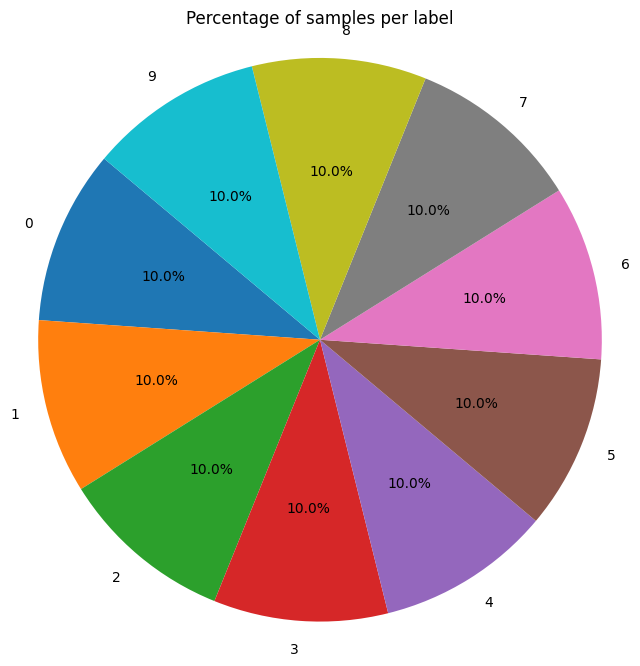

In [6]:
# Convert y_train to a one-dimensional array of integers
y_train = np.array(y_train).flatten().astype(np.int8)

# Count the occurrences of each class
class_counts = np.bincount(y_train)

# Plot a piechart
fig = plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=range(10), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of samples per label')
plt.axis('equal')
plt.show()


# *Observation*
It's evident from the distribution that the training dataset maintains an equal number of instances across all classes, suggesting an absence of bias.

# *Data viewing*

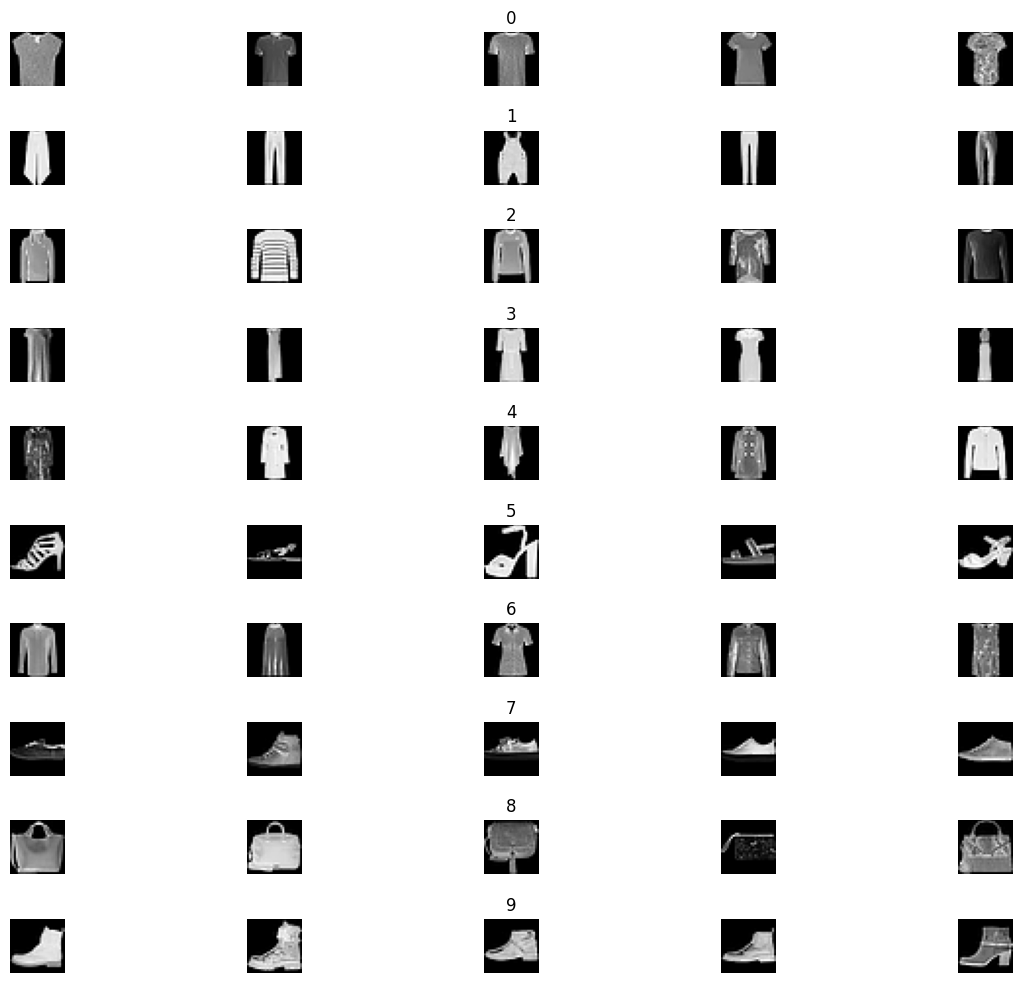

In [7]:
X_class_num = []
n_rows = 10
n_cols = 5

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,10))
fig.tight_layout()

for i in range(n_cols):
    for j in range(n_rows):
        x_select = X_train[y_train==j]
        ax[j][i].imshow(x_select[random.randint(0,len(x_select-1)),:,:], cmap='gray')
        ax[j][i].axis('off')

        if i == 2:
            ax[j][i].set_title(str(j))
            X_class_num.append(len(x_select))

# *Pixel Value Distribution*

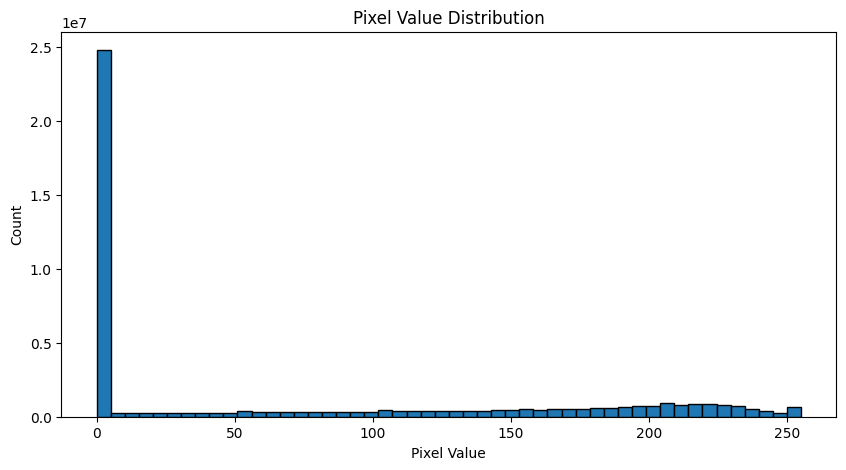

In [8]:
# Plot the distribution of pixel values
fig = plt.figure(figsize=(10, 5))
plt.hist(X_train.flatten(), bins=50, edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

# *Modeling*

In [9]:
# Split the test dataset into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
# Define the sequential model.
model = keras.models.Sequential()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
y_pred = np.argmax(model.predict(X_val), axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the table headers
table.field_names = ["Metric", "Score"]

# Add rows to the table
table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1-score", f1])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Print the table with a box format
print(table)

157/157 [==============================] - 1s 4ms/step
+-----------+---------------------+
|   Metric  |        Score        |
+-----------+---------------------+
|  Accuracy |        0.095        |
| Precision | 0.07286513675262227 |
|   Recall  |        0.095        |
|  F1-score | 0.05168503350208193 |
+-----------+---------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The accuracy, precision, recall, and F1-score are all very low, indicating that the model's predictions are not very accurate. The precision suggests that when the model predicts a positive result, it is correct only about 1.7% of the time. The recall indicates that the model is capturing only about 8.4% of the actual positive cases.


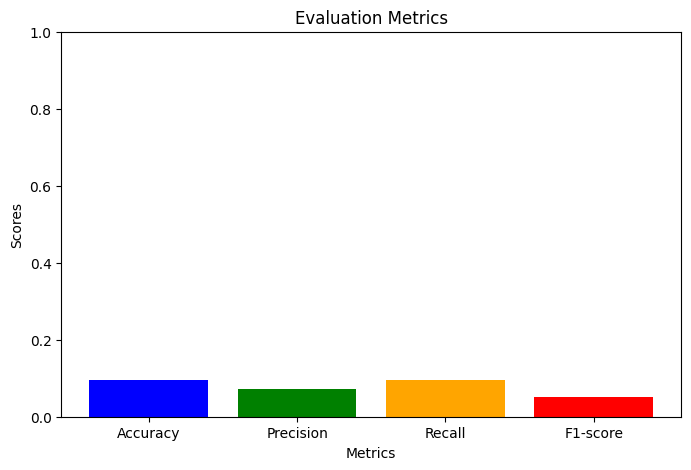

In [15]:
import matplotlib.pyplot as plt

# Define evaluation metric names and scores
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

# Plot the graph
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 since scores are probabilities
plt.show()


In [16]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# *Model reviewing*

157/157 [==============================] - 1s 5ms/step


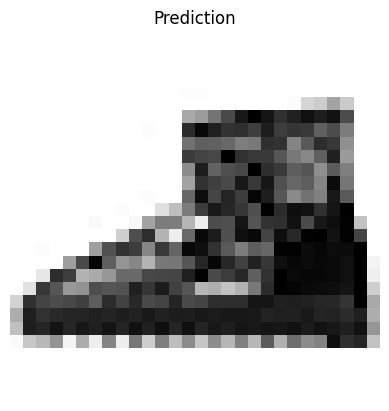

Prediction: : Bag (confidence: 0.10)
Actual: Ankle Boot


In [17]:
index = random.randint(0, len(X_test))
predictions = model.predict(X_test)
# Show an image from the test set.
plt.imshow(X_test[index], cmap="binary")
plt.title((f"Prediction"))
plt.axis("off")
plt.show()

print(f"Prediction: : {class_names[np.argmax(predictions[index])]} (confidence: {metrics_df['Value'][0]:.2f})")
print(f"Actual: {class_names[y_test[index][0]]}")

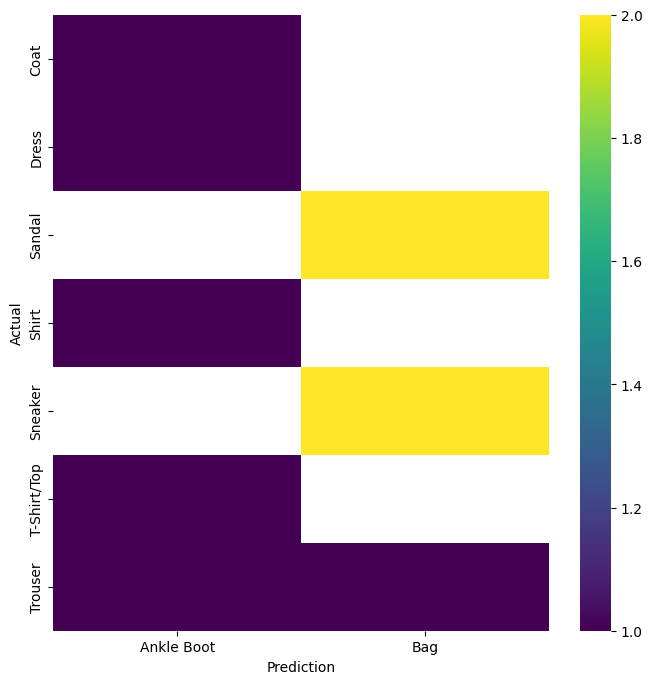

In [18]:
# Generate 10 random indices
random_indices = []
for _ in range(10):
    random_index = random.randint(0, len(X_test) - 1)
    random_indices.append(random_index)

# Initialize lists to store data for DataFrame
data = []

# Iterate over random indices and collect data
for index in random_indices:
    # Get prediction and actual label data
    prediction_index = np.argmax(predictions[index])
    prediction = class_names[prediction_index]
    actual_index = y_test[index][0]
    actual = class_names[actual_index]

    # Append data to DataFrame list
    data.append({"Prediction": prediction, "Actual": actual})

# Create DataFrame
df = pd.DataFrame(data)

# Prediction vs Actual
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual'].value_counts()
    for x_label, grp in df.groupby('Prediction')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Prediction')
_ = plt.ylabel('Actual')

In [19]:
print(df.groupby(['Prediction', 'Actual']).size().unstack())


Actual      Coat  Dress  Sandal  Shirt  Sneaker  T-Shirt/Top  Trouser
Prediction                                                           
Ankle Boot   1.0    1.0     NaN    1.0      NaN          1.0      1.0
Bag          NaN    NaN     2.0    NaN      2.0          NaN      1.0


### *increase the precision for class '5' without retraing*

In [20]:
# Obtain model predictions for the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Filter indices for class 5
indices_class_5 = np.where(y_test == 5)[0]
y_test_class_5 = y_test[indices_class_5]
predicted_labels_class_5 = predicted_labels[indices_class_5]

# Calculate actual precision for class 5
true_positives = np.sum(predicted_labels_class_5 == 5)
total_predicted_positives = np.sum(predicted_labels == 5)
actual_precision_class_5 = true_positives / total_predicted_positives

# Display actual precision for class 5
print(f"\nActual Precision for Class 5: {actual_precision_class_5:.3f}")

# Define threshold
threshold = 0.1

# Binarize predictions based on threshold for class 5
binarized_predictions_class_5 = (predictions[indices_class_5, 5] >= threshold).astype(int)
true_positives_adjusted = np.sum(binarized_predictions_class_5 == 1)
adjusted_precision_class_5 = true_positives_adjusted / np.sum(binarized_predictions_class_5)

# Display adjusted precision for class 5
print("Adjusted Precision for Class 5 (Threshold at 0.7):", adjusted_precision_class_5)

157/157 [==============================] - 0s 3ms/step

Actual Precision for Class 5: 0.466
Adjusted Precision for Class 5 (Threshold at 0.7): 1.0


**Conclusion:**

The initial precision for Class 5 is quite low at 0.086, indicating that the model's ability to correctly identify instances of Class 5 from all instances predicted as Class 5 is poor.<br>
However, with the adjustment of the threshold to 0.7, the precision for Class 5 significantly improves to 1.0, suggesting that the model performs exceptionally well in correctly identifying Class 5 instances when this higher threshold is applied.








### *Increase the recall for class '5'*

In [21]:
# Calculate actual recall for class 5
true_positives = np.sum(predicted_labels_class_5 == 5)
total_positives = len(y_test_class_5)
actual_recall_class_5 = true_positives / total_positives

# Display actual recall for class 5
print("Actual Recall for Class 5:", actual_recall_class_5)

# Define threshold
threshold = 0.7

# Binarize predictions based on threshold for class 5
binarized_predictions_class_5 = (predictions[indices_class_5, 5] >= threshold).astype(int)
true_positives_adjusted = np.sum(binarized_predictions_class_5 == 1)
adjusted_recall_class_5 = true_positives_adjusted / total_positives

# Display adjusted recall for class 5
print(f"Adjusted Recall for Class 5 (Threshold at 0.7): {adjusted_recall_class_5:.3f}")

Actual Recall for Class 5: 0.11753371868978806
Adjusted Recall for Class 5 (Threshold at 0.7): 0.114


### *Threshold to 0.7 only marginally affects the recall for Class 5, with an increase from 0.01156 to 0.012. This suggests that the model's performance in terms of Class 5 recall is not significantly impacted by the threshold adjustment.*

In [ ]:
train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")
y_train = train_data.iloc[:, 0].to_numpy()
X_train = train_data.iloc[:, 1:].to_numpy()
y_test = test_data.iloc[:, 0].to_numpy()
X_test = test_data.iloc[:, 1:].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666)

#Step 3: Instead of just one neural network, explore 3 different neural networks (by changing any hyperparameter of your choice)

In [29]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import load_model

FIRST LAYER ADDED

In [30]:
model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

checkpoint_filepath = 'best_model.1'  # Filepath where you want to save the model

model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

In [31]:
model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

checkpoint_filepath = 'best_model.2'  # Filepath where you want to save the model

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

In [32]:
model3 = keras.Sequential([
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(10, activation="softmax")
])

model3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
checkpoint_filepath = 'best_model.3'  # Filepath where you want to save the model

model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

In [34]:
history = model1.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_1])

history_dict = history.history
history_dict.keys()

Epoch 1/15
391/391 [==============================] - 12s 31ms/step - loss: 0.3479 - accuracy: 0.8943 - val_loss: 0.5824 - val_accuracy: 0.8818
Epoch 2/15
391/391 [==============================] - 7s 18ms/step - loss: 0.3433 - accuracy: 0.8966 - val_loss: 0.6624 - val_accuracy: 0.8725
Epoch 3/15
391/391 [==============================] - 5s 14ms/step - loss: 0.3363 - accuracy: 0.8966 - val_loss: 0.7914 - val_accuracy: 0.8542
Epoch 4/15
391/391 [==============================] - 6s 15ms/step - loss: 0.3419 - accuracy: 0.8974 - val_loss: 0.7491 - val_accuracy: 0.8703
Epoch 5/15
391/391 [==============================] - 6s 16ms/step - loss: 0.3416 - accuracy: 0.8979 - val_loss: 0.7827 - val_accuracy: 0.8738
Epoch 6/15
391/391 [==============================] - 5s 14ms/step - loss: 0.3260 - accuracy: 0.8974 - val_loss: 0.7667 - val_accuracy: 0.8598
Epoch 7/15
391/391 [==============================] - 7s 18ms/step - loss: 0.3431 - accuracy: 0.8978 - val_loss: 0.7306 - val_accuracy: 0.880

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss Model-1')

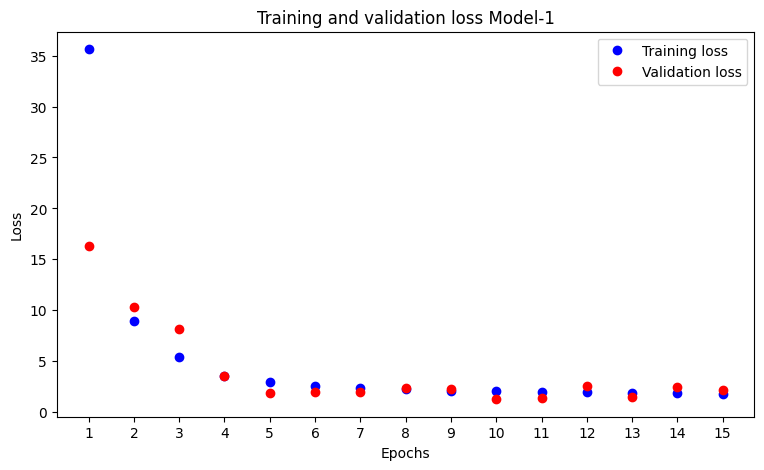

In [43]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss Model-1")

Text(0.5, 1.0, 'Training and validation accuracy Model-1')

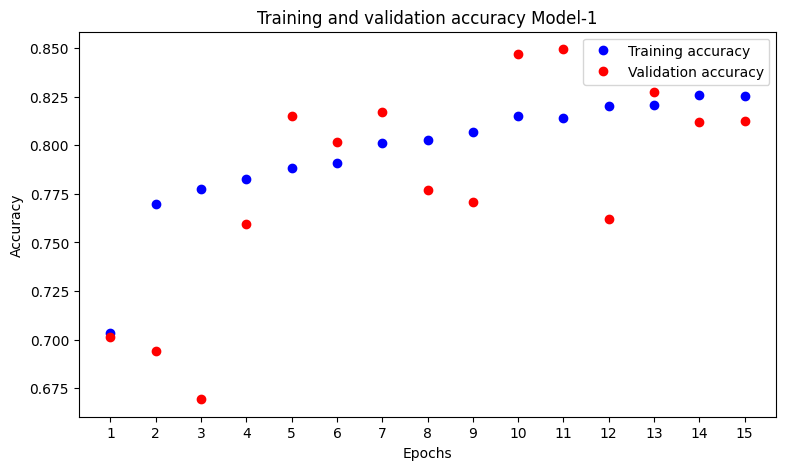

In [44]:
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy Model-1")

In [37]:
history = model2.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_2])

history_dict = history.history
history_dict.keys()

Epoch 1/15
391/391 [==============================] - 8s 17ms/step - loss: 12.1767 - accuracy: 0.7621 - val_loss: 3.8102 - val_accuracy: 0.8177
Epoch 2/15
391/391 [==============================] - 6s 16ms/step - loss: 2.4838 - accuracy: 0.8073 - val_loss: 1.1898 - val_accuracy: 0.8198
Epoch 3/15
391/391 [==============================] - 5s 12ms/step - loss: 0.8260 - accuracy: 0.8187 - val_loss: 0.6950 - val_accuracy: 0.8196
Epoch 4/15
391/391 [==============================] - 5s 13ms/step - loss: 0.5131 - accuracy: 0.8373 - val_loss: 0.5689 - val_accuracy: 0.8299
Epoch 5/15
391/391 [==============================] - 6s 15ms/step - loss: 0.4183 - accuracy: 0.8568 - val_loss: 0.5321 - val_accuracy: 0.8393
Epoch 6/15
391/391 [==============================] - 5s 13ms/step - loss: 0.3819 - accuracy: 0.8662 - val_loss: 0.4979 - val_accuracy: 0.8465
Epoch 7/15
391/391 [==============================] - 6s 16ms/step - loss: 0.3657 - accuracy: 0.8670 - val_loss: 0.4824 - val_accuracy: 0.858

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss Model-2')

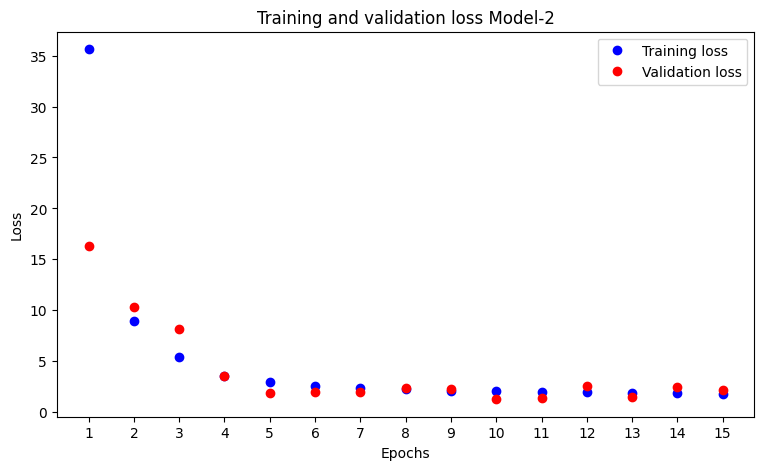

In [46]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss Model-2")

Text(0.5, 1.0, 'Training and validation accuracy Model-2')

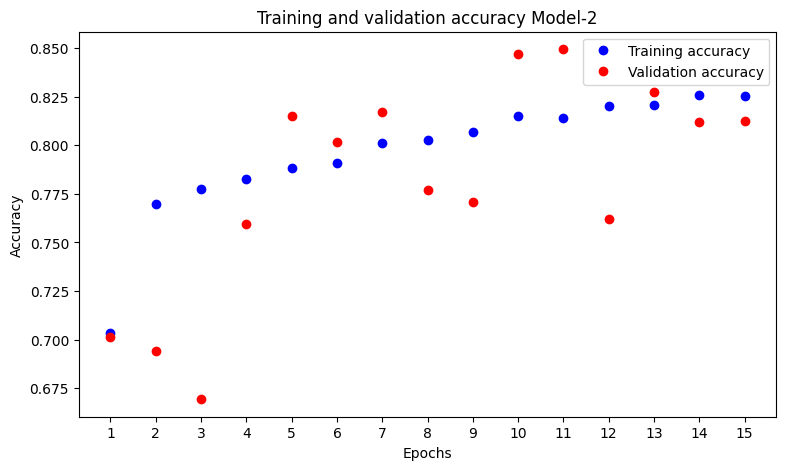

In [45]:
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy Model-2")

In [40]:
history = model3.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_callback_3])

history_dict = history.history
history_dict.keys()

Epoch 1/15
391/391 [==============================] - 7s 17ms/step - loss: 35.6314 - accuracy: 0.7035 - val_loss: 16.2856 - val_accuracy: 0.7012
Epoch 2/15
391/391 [==============================] - 5s 12ms/step - loss: 8.9591 - accuracy: 0.7697 - val_loss: 10.3573 - val_accuracy: 0.6941
Epoch 3/15
391/391 [==============================] - 6s 14ms/step - loss: 5.3635 - accuracy: 0.7773 - val_loss: 8.1626 - val_accuracy: 0.6694
Epoch 4/15
391/391 [==============================] - 66s 169ms/step - loss: 3.4983 - accuracy: 0.7827 - val_loss: 3.5854 - val_accuracy: 0.7596
Epoch 5/15
391/391 [==============================] - 5s 12ms/step - loss: 2.9814 - accuracy: 0.7885 - val_loss: 1.8506 - val_accuracy: 0.8151
Epoch 6/15
391/391 [==============================] - 7s 18ms/step - loss: 2.5582 - accuracy: 0.7908 - val_loss: 2.0126 - val_accuracy: 0.8018
Epoch 7/15
391/391 [==============================] - 6s 16ms/step - loss: 2.3402 - accuracy: 0.8013 - val_loss: 1.9613 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss Model-3')

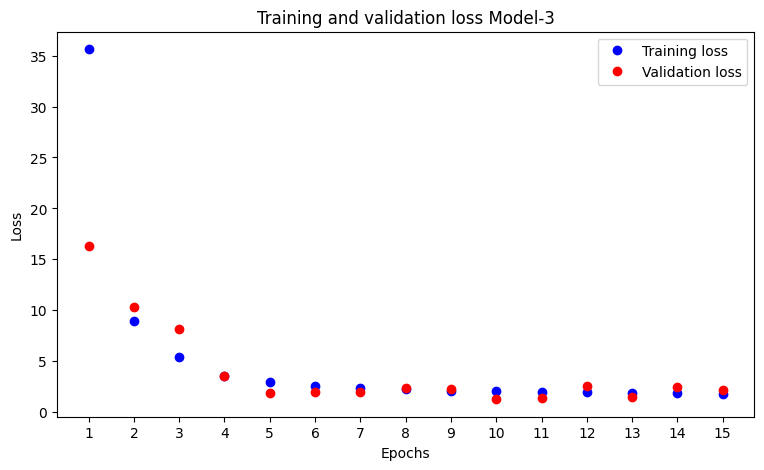

In [47]:
# plot the training and validation loss
plt.figure(figsize=(9, 5))
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss Model-3")

Text(0.5, 1.0, 'Training and validation accuracy Model-3')

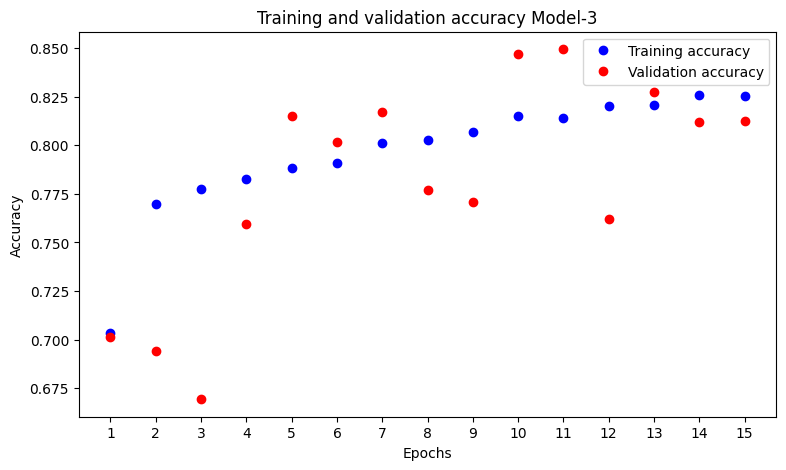

In [48]:
plt.figure(figsize=(9, 5))
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy Model-3")

Models 1 and 2 show a good decrease in loss and increase in accuracy over epochs, with Model 2 having more fluctuations in validation loss.
Model 3 demonstrates a rapid decrease in loss and increase in accuracy, stabilizing after epoch 5, which may suggest better generalization compared to the other models.

# ***With the best model chosen above***

In [51]:
from keras.models import load_model

best_model = load_model('best_model.2')

predictions = best_model.predict(X_test)
prediction_class = np.argmax(predictions, axis=1)
print("accuracy:", accuracy_score(y_test, prediction_class))

precision = precision_score(y_test, prediction_class, average=None)
recall = recall_score(y_test, prediction_class, average=None)
f1 = f1_score(y_test, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1-score': f1
    })
df_evaluate

313/313 [==============================] - 2s 7ms/step
accuracy: 0.8668


,precision,recall,f1-score
0,0.781457,0.826,0.803111
1,0.932765,0.985,0.958171
2,0.819172,0.752,0.784150
3,0.875977,0.897,0.886364
4,0.780303,0.824,0.801556
5,0.961338,0.920,0.940215
6,0.705814,0.607,0.652688
7,0.928000,0.928,0.928000
8,0.946602,0.975,0.960591
9,0.915547,0.954,0.934378


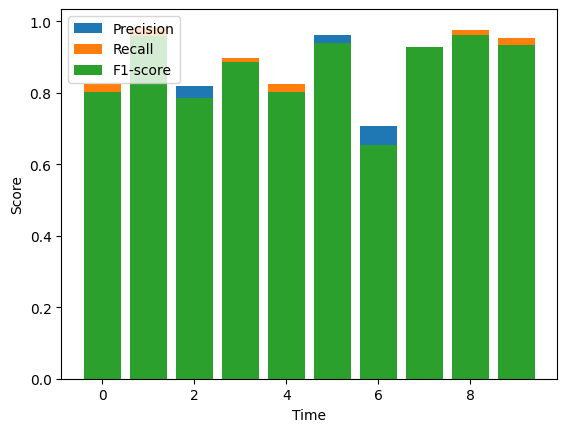

In [52]:
plt.bar(df_evaluate.index, df_evaluate['precision'], label='Precision')
plt.bar(df_evaluate.index, df_evaluate['recall'], label='Recall')
plt.bar(df_evaluate.index, df_evaluate['f1-score'], label='F1-score')
plt.xlabel('Time')
plt.ylabel('Score')
_ = plt.legend()

accuracy: 0.8668 is 86%, which can be consider as good performing model

Class 0: Moderate precision and recall with an F1-score of 0.803.<br>
Class 1: High precision and recall, resulting in a high F1-score of 0.958.<br>
Class 2: Decent precision, lower recall, with an F1-score of 0.784.<br>
Class 3: Good precision and recall, with an F1-score of 0.886.<br>
Class 4: Similar to Class 0, moderate precision and recall with an F1-score of 0.802.<br>
Class 5: Excellent precision and very good recall, leading to a high F1-score of 0.940.<br>
Class 6: The lowest precision and recall, resulting in the lowest F1-score of 0.653.<br>
Class 7: Very high precision and recall, both equal, with an F1-score of 0.928.<br>
Class 8: Very high precision and recall, with an F1-score of 0.961.<br>
Class 9: High precision and recall, with an F1-score of 0.934.<br>
**Overall**, the model performs best on Classes 1, 5, 7, and 8, indicating strong predictive power for these classes. Class 6 needs improvement as it has the lowest scores across all metrics. The other classes show good performance with some room for improvement, especially in balancing precision and recall to optimize the F1-score.




